In [20]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Load the test datasets
X_test = pd.read_csv('../outputs/X_test.csv')
y_test = pd.read_csv('../outputs/y_test.csv')

In [22]:
# Load the trained model
with open('../outputs/random_forest_churn_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [23]:
# Predict
y_pred = rf_model.predict(X_test)

In [24]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Accuracy: 0.78
Recall: 0.48


In [25]:
# Classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [26]:
# Export metrics to a text file
with open('../outputs/metrics_report.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy:.4f}\n")
    f.write(f"Recall: {recall:.4f}\n\n")
    f.write("Classification Report:\n")
    f.write(class_report)

True Negatives: 921
False Positives: 112
False Negatives: 193
True Positives: 181


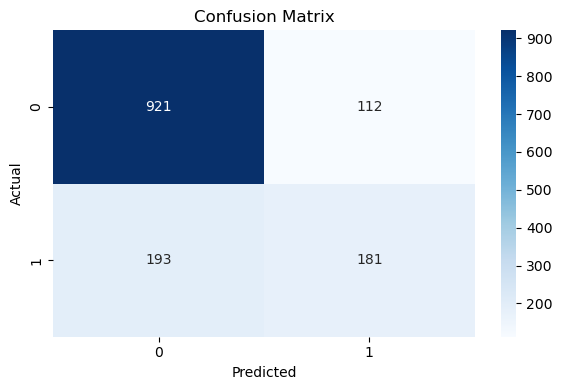

In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('../outputs/confusion_matrix.png')
plt.show()

           Feature  Importance
18    TotalCharges    0.184908
17  MonthlyCharges    0.177222
4           tenure    0.159101
14        Contract    0.083028
16   PaymentMethod    0.050095


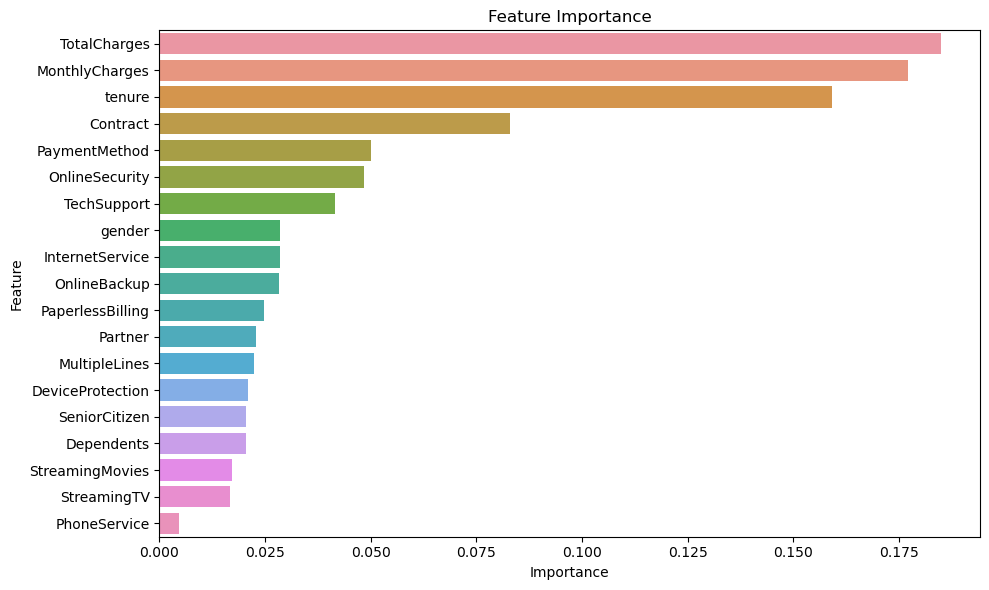

In [30]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X_test.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Get Top 5
top5_features = feature_importance_df.head(5)
print(top5_features)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig('../outputs/feature_importance.png')
plt.show()